In [1]:
!rm -r AI2021BS
!git clone https://github.com/UmbertoJr/AI2021BS.git

Cloning into 'AI2021BS'...
remote: Enumerating objects: 97, done.
remote: Counting objects: 100% (97/97), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 97 (delta 39), reused 77 (delta 19), pack-reused 0
Unpacking objects: 100% (97/97), done.


## Third Lab

What we are going to do today:
- Introduce two optimizers for local search methods
- Use the optimizer with the methods defined before

This cell below is simply importing some useful stuff for later

In [2]:
import glob
import numpy as np
from matplotlib import pyplot as plt
from time import time as t

## Optimizers
### 2opt
As we saw last time, we have 12 problems and two have an optimal solution

## Solution

In [3]:
import numpy as np
from AI2021BS.src.utils import compute_length


def step2opt(solution, matrix_dist, distance):
  seq_length = len(solution) - 1
  tsp_sequence = np.array(solution)
  uncrosses = 0
  # TODO

  # END TODO
  return tsp_sequence, distance, uncrosses


def swap2opt(tsp_sequence, i, j):
  # TODO
  
  # END TODO
  return new_tsp_sequence


def gain(i, j, tsp_sequence, matrix_dist):
  old_link_len = (matrix_dist[tsp_sequence[i], tsp_sequence[i - 1]] + 
                  matrix_dist[tsp_sequence[j], tsp_sequence[j + 1]])
  changed_links_len = (matrix_dist[tsp_sequence[j], tsp_sequence[i - 1]] + 
                       matrix_dist[tsp_sequence[i], tsp_sequence[j + 1]])
  return - old_link_len + changed_links_len


def loop2opt(solution, instance, max_num_of_uncrosses=10000):
    matrix_dist = instance.dist_matrix
    new_len = compute_length(solution, matrix_dist)
    new_tsp_sequence = np.copy(np.array(solution))
    uncross = 0
    # TODO

    # END TODO
    return new_tsp_sequence.tolist(), new_len, uncross
    

#### Let's test it



#############################
name: eil76
nPoints: 76
best_sol: 538.0
exist optimal: True


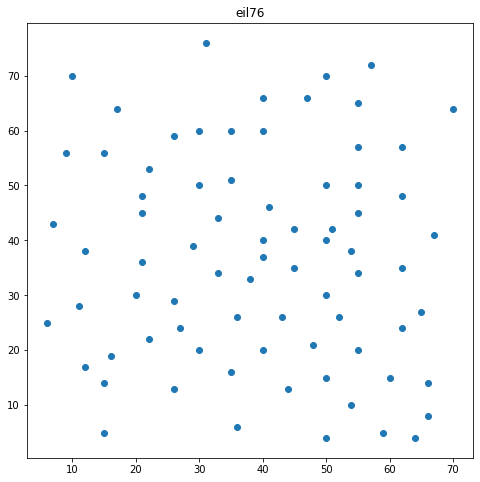

In [4]:
from AI2021BS.src.io_tsp import ProblemInstance
example_problem = "AI2021BS/problems/eil76.tsp"
p_inst = ProblemInstance(example_problem)
p_inst.print_info()
p_inst.plot_data()

In [5]:
from AI2021BS.src.TSP_solver import TSPSolver
from AI2021BS.src.constructive_algorithms import (
    random_method,
    nearest_neighbor,
    best_nearest_neighbor,
    multi_fragment_mf
)

available_solvers = {
    "random": random_method,
    "nn":nearest_neighbor,
    "best_nn":best_nearest_neighbor,
    "multi_fragment": multi_fragment_mf
}

###  solving with ['nn'] ####


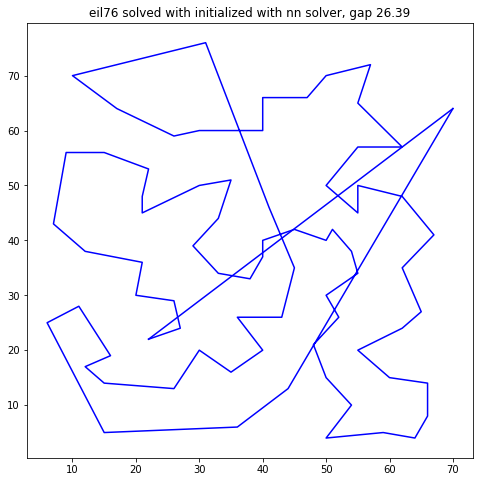

best solution with len 680.0 
with a total time of 0.00471 seconds
solution found has a 26.39 % gap
0.00015592575073242188


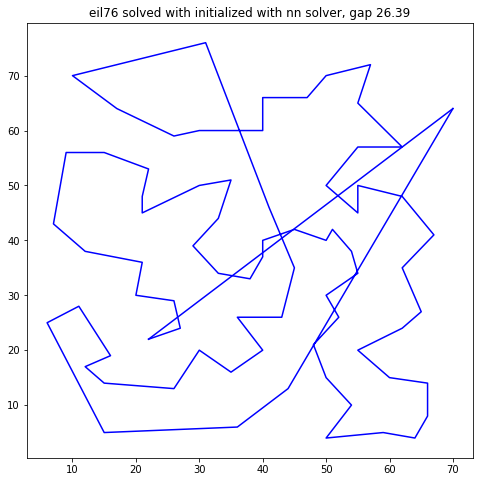

 26.39 % gap
with 0 number of uncrossed edges


In [6]:
solver = TSPSolver("nn", p_inst, available_solvers)
start = t()
solver.compute_solution(return_value=False, verbose=True)
end = t()

solver.plot_solution()
print(f"best solution with len {solver.found_length} \nwith a total time of {np.round(end - start, 5)} seconds")
print(f"solution found has a {solver.gap} % gap")

start = t()
solution, new_length, uncross = loop2opt(solver.solution, p_inst)
end = t()
print(end -  start)
solver.method = "nn folowed by 2 opt"

assert solver.pass_and_check_if_solution_is_valid(solution), "Solution non valid"
solver.solved = True
solver.solution = solution
solver.plot_solution()
solver._gap()
print(f" {solver.gap} % gap")
print(f"with {uncross} number of uncrossed edges")

### 2.5opt

In [7]:
import numpy as np

from AI2021BS.src.utils import compute_length

def step2dot5opt(solution, matrix_dist, distance):
    seq_length = len(solution) - 2
    tsp_sequence = np.array(solution)
    uncrosses = 0
    for i in range(1, seq_length - 1):
        for j in range(i + 1, seq_length):
          #TODO
          pass 
          # END TODO
    return tsp_sequence, distance, uncrosses


def shift1(tsp_sequence, i, j):
    new_tsp_sequence = np.concatenate(
        [tsp_sequence[:i], tsp_sequence[i + 1: j + 1], [tsp_sequence[i]], tsp_sequence[j + 1:]])
    return new_tsp_sequence


def shift_gain1(i, j, tsp_sequence, matrix_dist):
    old_link_len = (matrix_dist[tsp_sequence[i], tsp_sequence[i - 1]] +
                    matrix_dist[tsp_sequence[i], tsp_sequence[i + 1]] +
                    matrix_dist[tsp_sequence[j], tsp_sequence[j + 1]])
    changed_links_len = (matrix_dist[tsp_sequence[i - 1], tsp_sequence[i + 1]] +
                         matrix_dist[tsp_sequence[i], tsp_sequence[j]]
                         + matrix_dist[tsp_sequence[i], tsp_sequence[j + 1]])
    return - old_link_len + changed_links_len


def shift2(tsp_sequence, i, j):
    new_tsp_sequence = np.concatenate(
        [tsp_sequence[:i], [tsp_sequence[j]], tsp_sequence[i: j], tsp_sequence[j + 1:]])
    return new_tsp_sequence


def shift_gain2(i, j, tsp_sequence, matrix_dist):
    old_link_len = (matrix_dist[tsp_sequence[i], tsp_sequence[i - 1]] + matrix_dist[
        tsp_sequence[j], tsp_sequence[j - 1]] + matrix_dist[tsp_sequence[j], tsp_sequence[j + 1]])
    changed_links_len = (
            matrix_dist[tsp_sequence[j], tsp_sequence[i - 1]] + matrix_dist[tsp_sequence[i], tsp_sequence[j]] +
            matrix_dist[tsp_sequence[j - 1], tsp_sequence[j + 1]])
    return - old_link_len + changed_links_len


def loop2dot5opt(solution, instance, max_num_of_changes=10000):
    matrix_dist = instance.dist_matrix
    actual_len = compute_length(solution, matrix_dist)
    new_tsp_sequence = np.copy(np.array(solution))
    uncross = 0
    new_len = actual_len
    while uncross < max_num_of_changes:
      # TODO
      break     
      # END TODO
    return new_tsp_sequence.tolist(), new_len, uncross

###  solving with ['nn'] ####


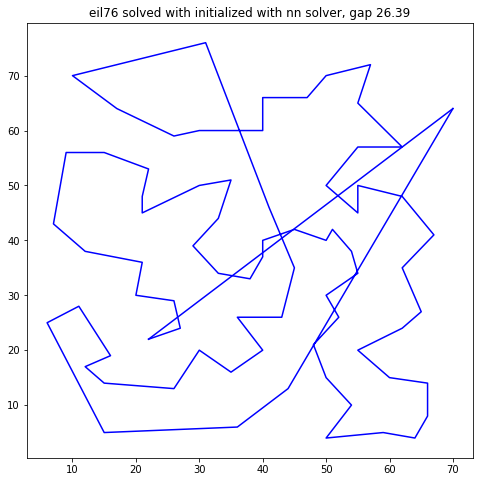

best solution with len 680.0 
with a total time of 0.00459 seconds
solution found has a 26.39 % gap
0.00015354156494140625


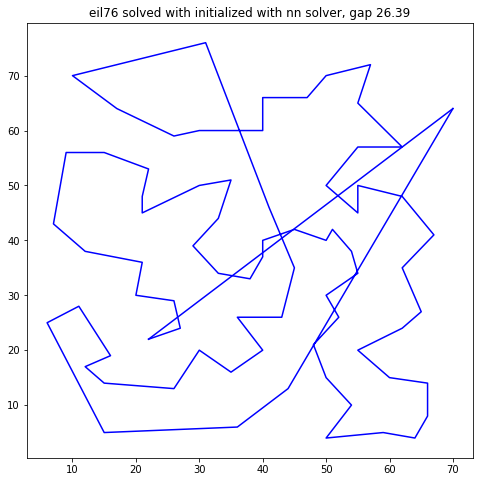

 26.39 % gap
with 0 number of uncrossed edges


In [8]:
solver = TSPSolver("nn", p_inst, available_solvers)
start = t()
solver.compute_solution(return_value=False, verbose=True)
end = t()

solver.plot_solution()
print(f"best solution with len {solver.found_length} \nwith a total time of {np.round(end - start, 5)} seconds")
print(f"solution found has a {solver.gap} % gap")

start = t()
solution, new_length, uncross = loop2dot5opt(solver.solution, p_inst)
end = t()
print(end -  start)
solver.method = "nn folowed by 2.5 opt"

assert solver.pass_and_check_if_solution_is_valid(solution), "Solution non valid"
solver.solved = True
solver.solution = solution
solver.plot_solution()
solver._gap()
print(f" {solver.gap} % gap")
print(f"with {uncross} number of uncrossed edges")

### Let's analyse the performances of the optimizers and the algorithms discussed until now


###  solving with ['nn'] ####


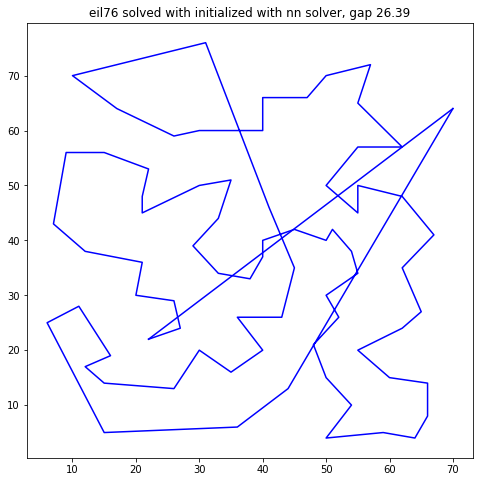

best solution with len 680.0 
with a total time of 0.00281 seconds
solution found has a 26.39 % gap
0.0002155303955078125


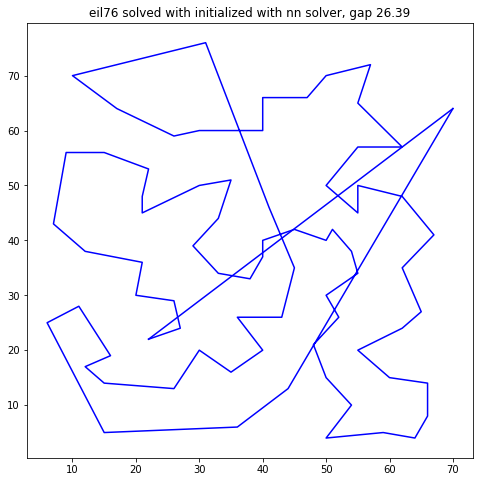

 26.39 % gap
with 0 number of uncrossed edges
0.0002033710479736328


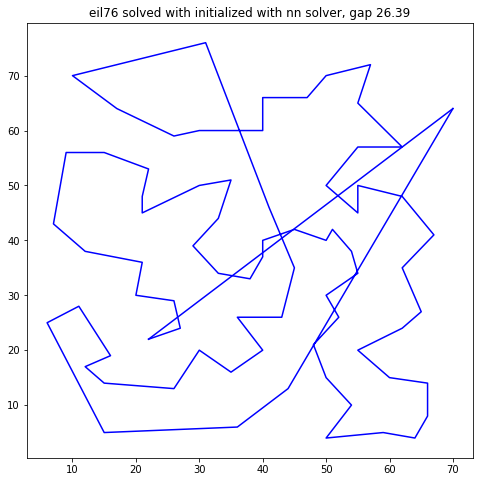

 26.39 % gap
with 0 number of uncrossed edges


In [9]:
solver = TSPSolver("nn", p_inst, available_solvers)
start = t()
solver.compute_solution(return_value=False, verbose=True)
end = t()

solver.plot_solution()
print(f"best solution with len {solver.found_length} \nwith a total time of {np.round(end - start, 5)} seconds")
print(f"solution found has a {solver.gap} % gap")

old_solution=solver.solution


start = t()
solution, new_length, uncross = loop2opt(old_solution, p_inst)
end = t()
print(end -  start)
solver.method = "nn folowed by 2 opt"

assert solver.pass_and_check_if_solution_is_valid(solution), "Solution non valid"
solver.solved = True
solver.solution = solution
solver.plot_solution()
solver._gap()
print(f" {solver.gap} % gap")
print(f"with {uncross} number of uncrossed edges")

start = t()
solution, new_length, uncross = loop2dot5opt(old_solution, p_inst)
end = t()
print(end -  start)
solver.method = "nn folowed by 2.5 opt"

assert solver.pass_and_check_if_solution_is_valid(solution), "Solution non valid"
solver.solved = True
solver.solution = solution
solver.plot_solution()
solver._gap()
print(f" {solver.gap} % gap")
print(f"with {uncross} number of uncrossed edges")